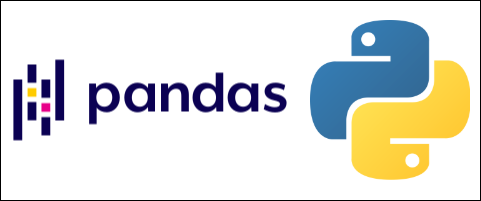

# <font color='green'> <b>Importing Libraries </b><font color='black'>

In [71]:
import numpy as np
import pandas as pd

# <font color='green'> <b>Missing Values</b><font color='black'>

In [72]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])

df0 = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })

In [73]:
df = df0.copy()       #We want df0 to remain original.
df

id gender status  dept var1  var2 salary
0   P001      M     FT    DS    2   8.0    NaN
1   P002      F     PT    FS    3   NaN     54
2   P003      M      -   AWS    5   5.0     59
3   P004      F     FT   AWS  nan   8.0    120
4   P005      M     PT    DS    7  11.0     58
5   P006      F     PT  None    1   NaN     75
6   P007      M     FT    FS  nan   NaN   None
7   P008      F      -    FS   10   2.0    136
8   P009      M     PT   NaN   14   3.0     60
9   P010      F     FT    DS    -   7.0    125
10  P011      M    NaN   AWS    6   9.0    NaN

In [74]:
df["var1"] = df["var1"].replace(to_replace = "-", value = np.nan).astype("float")
df["var1"]

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [75]:
df["status"] = df["status"].replace("-", np.nan)
df["status"]

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

## <font color='blue'> <b>Filling Missing Values (Imputation)</b><font color='black'>

### <font color='orange'> <b>Filling Numeric Variables</b><font color='orange'>

In [76]:
df

id gender status  dept  var1  var2 salary
0   P001      M     FT    DS   2.0   8.0    NaN
1   P002      F     PT    FS   3.0   NaN     54
2   P003      M    NaN   AWS   5.0   5.0     59
3   P004      F     FT   AWS   NaN   8.0    120
4   P005      M     PT    DS   7.0  11.0     58
5   P006      F     PT  None   1.0   NaN     75
6   P007      M     FT    FS   NaN   NaN   None
7   P008      F    NaN    FS  10.0   2.0    136
8   P009      M     PT   NaN  14.0   3.0     60
9   P010      F     FT    DS   NaN   7.0    125
10  P011      M    NaN   AWS   6.0   9.0    NaN

In [77]:
df.fillna(0)

id gender status dept  var1  var2  salary
0   P001      M     FT   DS   2.0   8.0       0
1   P002      F     PT   FS   3.0   0.0      54
2   P003      M      0  AWS   5.0   5.0      59
3   P004      F     FT  AWS   0.0   8.0     120
4   P005      M     PT   DS   7.0  11.0      58
5   P006      F     PT    0   1.0   0.0      75
6   P007      M     FT   FS   0.0   0.0       0
7   P008      F      0   FS  10.0   2.0     136
8   P009      M     PT    0  14.0   3.0      60
9   P010      F     FT   DS   0.0   7.0     125
10  P011      M      0  AWS   6.0   9.0       0

In [78]:
df.var1.fillna(0) #It filled the NaN values in the var1 column with 0. No permanent changes were made.

0      2.0
1      3.0
2      5.0
3      0.0
4      7.0
5      1.0
6      0.0
7     10.0
8     14.0
9      0.0
10     6.0
Name: var1, dtype: float64

In [79]:
df

id gender status  dept  var1  var2 salary
0   P001      M     FT    DS   2.0   8.0    NaN
1   P002      F     PT    FS   3.0   NaN     54
2   P003      M    NaN   AWS   5.0   5.0     59
3   P004      F     FT   AWS   NaN   8.0    120
4   P005      M     PT    DS   7.0  11.0     58
5   P006      F     PT  None   1.0   NaN     75
6   P007      M     FT    FS   NaN   NaN   None
7   P008      F    NaN    FS  10.0   2.0    136
8   P009      M     PT   NaN  14.0   3.0     60
9   P010      F     FT    DS   NaN   7.0    125
10  P011      M    NaN   AWS   6.0   9.0    NaN

In [80]:
df.var1.mean() #"It does not include NaN values in the processing when calculating the mean. Permanent changes are made with inplace=True.

6.0

In [81]:
df.var1.fillna(df.var1.mean())  #It filled the NaN values in var1 with the mean.

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      6.0
7     10.0
8     14.0
9      6.0
10     6.0
Name: var1, dtype: float64

In [82]:
df.var1.fillna(df.var1.median())

0      2.0
1      3.0
2      5.0
3      5.5
4      7.0
5      1.0
6      5.5
7     10.0
8     14.0
9      5.5
10     6.0
Name: var1, dtype: float64

In [83]:
df

id gender status  dept  var1  var2 salary
0   P001      M     FT    DS   2.0   8.0    NaN
1   P002      F     PT    FS   3.0   NaN     54
2   P003      M    NaN   AWS   5.0   5.0     59
3   P004      F     FT   AWS   NaN   8.0    120
4   P005      M     PT    DS   7.0  11.0     58
5   P006      F     PT  None   1.0   NaN     75
6   P007      M     FT    FS   NaN   NaN   None
7   P008      F    NaN    FS  10.0   2.0    136
8   P009      M     PT   NaN  14.0   3.0     60
9   P010      F     FT    DS   NaN   7.0    125
10  P011      M    NaN   AWS   6.0   9.0    NaN

### <font color='orange'> <b>Filling Categorical Variables</b><font color='orange'>

In [84]:
df.dept.mode() #Since all values are equal, it returned the mode in the same order.

0    AWS
1     DS
2     FS
Name: dept, dtype: object

In [85]:
df.dept.mode()[0]

'AWS'

In [86]:
df.gender.mode()

0    M
Name: gender, dtype: object

In [87]:
df.dept.fillna(df.dept.mode()[0])

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [88]:
df.dept.fillna(method="bfill") #backfill

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      FS
6      FS
7      FS
8      DS
9      DS
10    AWS
Name: dept, dtype: object

In [89]:
df.dept.fillna(method="ffill")  # bj.ffill() or obj.bfill(),  new form

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      DS
6      FS
7      FS
8      FS
9      DS
10    AWS
Name: dept, dtype: object

In [90]:
#bfill (backward fill) fills missing values with the next valid value that comes after them, while 
#ffill (forward fill) fills missing values with the last valid value that comes before them.

In [91]:
df.dept.fillna(method="ffill", inplace=True)

In [92]:
df

id gender status dept  var1  var2 salary
0   P001      M     FT   DS   2.0   8.0    NaN
1   P002      F     PT   FS   3.0   NaN     54
2   P003      M    NaN  AWS   5.0   5.0     59
3   P004      F     FT  AWS   NaN   8.0    120
4   P005      M     PT   DS   7.0  11.0     58
5   P006      F     PT   DS   1.0   NaN     75
6   P007      M     FT   FS   NaN   NaN   None
7   P008      F    NaN   FS  10.0   2.0    136
8   P009      M     PT   FS  14.0   3.0     60
9   P010      F     FT   DS   NaN   7.0    125
10  P011      M    NaN  AWS   6.0   9.0    NaN

In [93]:
df.salary.bfill()  #If the last value is NaN, it cannot fill it.

0      54.0
1      54.0
2      59.0
3     120.0
4      58.0
5      75.0
6     136.0
7     136.0
8      60.0
9     125.0
10      NaN
Name: salary, dtype: float64

In [94]:
df

id gender status dept  var1  var2 salary
0   P001      M     FT   DS   2.0   8.0    NaN
1   P002      F     PT   FS   3.0   NaN     54
2   P003      M    NaN  AWS   5.0   5.0     59
3   P004      F     FT  AWS   NaN   8.0    120
4   P005      M     PT   DS   7.0  11.0     58
5   P006      F     PT   DS   1.0   NaN     75
6   P007      M     FT   FS   NaN   NaN   None
7   P008      F    NaN   FS  10.0   2.0    136
8   P009      M     PT   FS  14.0   3.0     60
9   P010      F     FT   DS   NaN   7.0    125
10  P011      M    NaN  AWS   6.0   9.0    NaN

### <font color='orange'> <b>Filling by condition & group</b><font color='black'>

In [95]:
df.groupby("status")["salary"].mean()

status
FT    122.5
PT    61.75
Name: salary, dtype: object

In [96]:
df

id gender status dept  var1  var2 salary
0   P001      M     FT   DS   2.0   8.0    NaN
1   P002      F     PT   FS   3.0   NaN     54
2   P003      M    NaN  AWS   5.0   5.0     59
3   P004      F     FT  AWS   NaN   8.0    120
4   P005      M     PT   DS   7.0  11.0     58
5   P006      F     PT   DS   1.0   NaN     75
6   P007      M     FT   FS   NaN   NaN   None
7   P008      F    NaN   FS  10.0   2.0    136
8   P009      M     PT   FS  14.0   3.0     60
9   P010      F     FT   DS   NaN   7.0    125
10  P011      M    NaN  AWS   6.0   9.0    NaN

In [97]:
df.loc[df.salary > 90, "status"]

3     FT
7    NaN
9     FT
Name: status, dtype: object

In [98]:
df.loc[df.salary > 90, "status"].mode()[0]

'FT'

In [99]:
df.loc[df.salary <= 90, "status"]

1     PT
2    NaN
4     PT
5     PT
8     PT
Name: status, dtype: object

In [100]:
df.loc[df.salary > 90, "status"].fillna(df.loc[df.salary > 90, "status"].mode()[0]) #In the first code, we filled the NaN value with the mode.

3    FT
7    FT
9    FT
Name: status, dtype: object

In [101]:
#inplace=True did not work because multiple statements were used.
df.loc[df.salary > 90, "status"].fillna(df.loc[df.salary > 90, "status"].mode()[0], inplace=True)

In [102]:
df

id gender status dept  var1  var2 salary
0   P001      M     FT   DS   2.0   8.0    NaN
1   P002      F     PT   FS   3.0   NaN     54
2   P003      M    NaN  AWS   5.0   5.0     59
3   P004      F     FT  AWS   NaN   8.0    120
4   P005      M     PT   DS   7.0  11.0     58
5   P006      F     PT   DS   1.0   NaN     75
6   P007      M     FT   FS   NaN   NaN   None
7   P008      F    NaN   FS  10.0   2.0    136
8   P009      M     PT   FS  14.0   3.0     60
9   P010      F     FT   DS   NaN   7.0    125
10  P011      M    NaN  AWS   6.0   9.0    NaN

In [103]:
#If inplace=True doesn't work, you may need to use the assignment operation (=).
df.loc[df.salary > 90, "status"] = df.loc[df.salary > 90, "status"].mode()[0]

In [104]:
df

id gender status dept  var1  var2 salary
0   P001      M     FT   DS   2.0   8.0    NaN
1   P002      F     PT   FS   3.0   NaN     54
2   P003      M    NaN  AWS   5.0   5.0     59
3   P004      F     FT  AWS   NaN   8.0    120
4   P005      M     PT   DS   7.0  11.0     58
5   P006      F     PT   DS   1.0   NaN     75
6   P007      M     FT   FS   NaN   NaN   None
7   P008      F     FT   FS  10.0   2.0    136
8   P009      M     PT   FS  14.0   3.0     60
9   P010      F     FT   DS   NaN   7.0    125
10  P011      M    NaN  AWS   6.0   9.0    NaN

In [105]:
df.loc[df.salary <= 90, "status"] = df.loc[df.salary <= 90, "status"].mode()[0]

In [106]:
df

id gender status dept  var1  var2 salary
0   P001      M     FT   DS   2.0   8.0    NaN
1   P002      F     PT   FS   3.0   NaN     54
2   P003      M     PT  AWS   5.0   5.0     59
3   P004      F     FT  AWS   NaN   8.0    120
4   P005      M     PT   DS   7.0  11.0     58
5   P006      F     PT   DS   1.0   NaN     75
6   P007      M     FT   FS   NaN   NaN   None
7   P008      F     FT   FS  10.0   2.0    136
8   P009      M     PT   FS  14.0   3.0     60
9   P010      F     FT   DS   NaN   7.0    125
10  P011      M    NaN  AWS   6.0   9.0    NaN

**Let's fill the last missing value in the 'Status' column with the mode of 'gender' and 'dept' groups.**>

In [107]:
df.groupby(["gender", "dept"])["status"].transform(lambda x: x.mode()[0]) #I didn't get the correct output because I made the change non-permanent.

0     FT
1     FT
2     PT
3     FT
4     FT
5     FT
6     FT
7     FT
8     FT
9     FT
10    PT
Name: status, dtype: object

In [108]:
df.status.fillna(df.groupby(["gender", "dept"])["status"].transform(lambda x: x.mode()[0]), inplace=True) 

In [109]:
df

id gender status dept  var1  var2 salary
0   P001      M     FT   DS   2.0   8.0    NaN
1   P002      F     PT   FS   3.0   NaN     54
2   P003      M     PT  AWS   5.0   5.0     59
3   P004      F     FT  AWS   NaN   8.0    120
4   P005      M     PT   DS   7.0  11.0     58
5   P006      F     PT   DS   1.0   NaN     75
6   P007      M     FT   FS   NaN   NaN   None
7   P008      F     FT   FS  10.0   2.0    136
8   P009      M     PT   FS  14.0   3.0     60
9   P010      F     FT   DS   NaN   7.0    125
10  P011      M     PT  AWS   6.0   9.0    NaN

In [110]:
df.var1.fillna(df.groupby(["gender", "status"])["var1"].transform("mean"), inplace=False)

0      2.0
1      3.0
2      5.0
3     10.0
4      7.0
5      1.0
6      2.0
7     10.0
8     14.0
9     10.0
10     6.0
Name: var1, dtype: float64

In [111]:
df.var1.fillna(df.groupby(["gender", "status"])["var1"].transform(lambda x: x.mode()[0]), inplace=True)

In [112]:
df.var2.fillna(df.groupby("status")["var2"].transform("mean"), inplace=False) 

0      8.00
1      7.00
2      5.00
3      8.00
4     11.00
5      7.00
6      6.25
7      2.00
8      3.00
9      7.00
10     9.00
Name: var2, dtype: float64

In [113]:
df.var2.fillna(df.groupby("status")["var2"].transform("mean"), inplace=True)

In [114]:
df

id gender status dept  var1   var2 salary
0   P001      M     FT   DS   2.0   8.00    NaN
1   P002      F     PT   FS   3.0   7.00     54
2   P003      M     PT  AWS   5.0   5.00     59
3   P004      F     FT  AWS  10.0   8.00    120
4   P005      M     PT   DS   7.0  11.00     58
5   P006      F     PT   DS   1.0   7.00     75
6   P007      M     FT   FS   2.0   6.25   None
7   P008      F     FT   FS  10.0   2.00    136
8   P009      M     PT   FS  14.0   3.00     60
9   P010      F     FT   DS  10.0   7.00    125
10  P011      M     PT  AWS   6.0   9.00    NaN

In [115]:
df.salary.fillna(df.groupby(["status","dept"])["salary"].transform(lambda x: x.mode()[0]), inplace=False)

0     125
1      54
2      59
3     120
4      58
5      75
6     136
7     136
8      60
9     125
10     59
Name: salary, dtype: int64

In [116]:
df.salary.fillna(df.groupby(["status","dept"])["salary"].transform(lambda x: x.mode()[0]), inplace=True)

In [117]:
df0

id gender status  dept var1  var2 salary
0   P001      M     FT    DS    2   8.0    NaN
1   P002      F     PT    FS    3   NaN     54
2   P003      M      -   AWS    5   5.0     59
3   P004      F     FT   AWS  nan   8.0    120
4   P005      M     PT    DS    7  11.0     58
5   P006      F     PT  None    1   NaN     75
6   P007      M     FT    FS  nan   NaN   None
7   P008      F      -    FS   10   2.0    136
8   P009      M     PT   NaN   14   3.0     60
9   P010      F     FT    DS    -   7.0    125
10  P011      M    NaN   AWS    6   9.0    NaN

In [118]:
df

id gender status dept  var1   var2  salary
0   P001      M     FT   DS   2.0   8.00     125
1   P002      F     PT   FS   3.0   7.00      54
2   P003      M     PT  AWS   5.0   5.00      59
3   P004      F     FT  AWS  10.0   8.00     120
4   P005      M     PT   DS   7.0  11.00      58
5   P006      F     PT   DS   1.0   7.00      75
6   P007      M     FT   FS   2.0   6.25     136
7   P008      F     FT   FS  10.0   2.00     136
8   P009      M     PT   FS  14.0   3.00      60
9   P010      F     FT   DS  10.0   7.00     125
10  P011      M     PT  AWS   6.0   9.00      59

# <font color='green'> <b>Combining DataFrames</b><font color='black'>

**Difference between merge, join, and concatenate;**

[Source01](https://realpython.com/pandas-merge-join-and-concat/), 
[Source02](https://studymachinelearning.com/difference-between-merge-join-and-concatenate/abs), 
[Source03](https://www.educba.com/pandas-merge-vs-join/),
[Source04](https://pandas.pydata.org/docs/user_guide/merging.html), 
[Source05](https://stackoverflow.com/questions/38256104/differences-between-merge-and-concat-in-pandas)

**concat();** 

-We can perform vertical and horizontal concatenation.

-We can merge two or more dataframes simultaneously.

-It is not necessary to have common columns.

-We can perform both row-wise and column-wise concatenation. The "axis" parameter is available only in concat().

We can perform horizontal merging with **concat(), join() and merge()** 

**join()** we can merge two or more dataframes simultaneously, but if they have the same column names, we can merge at most two dataframes.

**merge();** 

-We can merge two dataframes simultaneously.

-We perform the merging operation based on a common column.

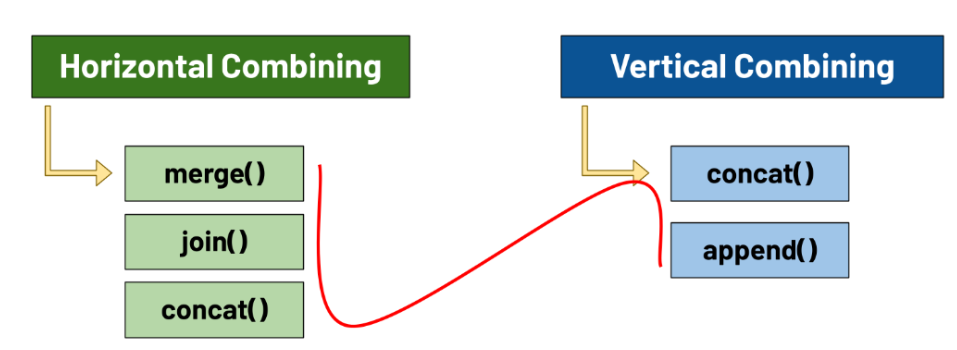

In [119]:
import seaborn as sns

In [120]:
one = pd.DataFrame({
   'name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
   'subject_id':['sub1','sub2','sub4','sub6','sub5'],
   'marks_scored':[98,90,87,69,78]},
   index=[1,2,3,4,5])

two = pd.DataFrame({
   'name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
   'subject_id':['sub2','sub4','sub3','sub6','sub5'],
   'marks_scored':[89,80,79,97,88]},
   index=[1,2,3,4,5])

## <font color='blue'> <b>concat()</b><font color='black'>
    
**concat()**, is used to concatenate two or more DataFrames along rows or columns.

It can be used to bring together different datasets into the same dataset or to add new columns or rows to a dataset.

There is no need for any common columns between the datasets.

[Source 01](https://pandas.pydata.org/docs/reference/api/pandas.concat.html), 
[Source 02](https://sparkbyexamples.com/pandas/pandas-concat-dataframes-explained/), 
[Source 03](https://practicaldatascience.co.uk/data-science/how-to-use-pandas-concat-to-concatenate-dataframes) & 
[Source 04](https://www.tutorialspoint.com/python_pandas/python_pandas_concatenation.htm)
    
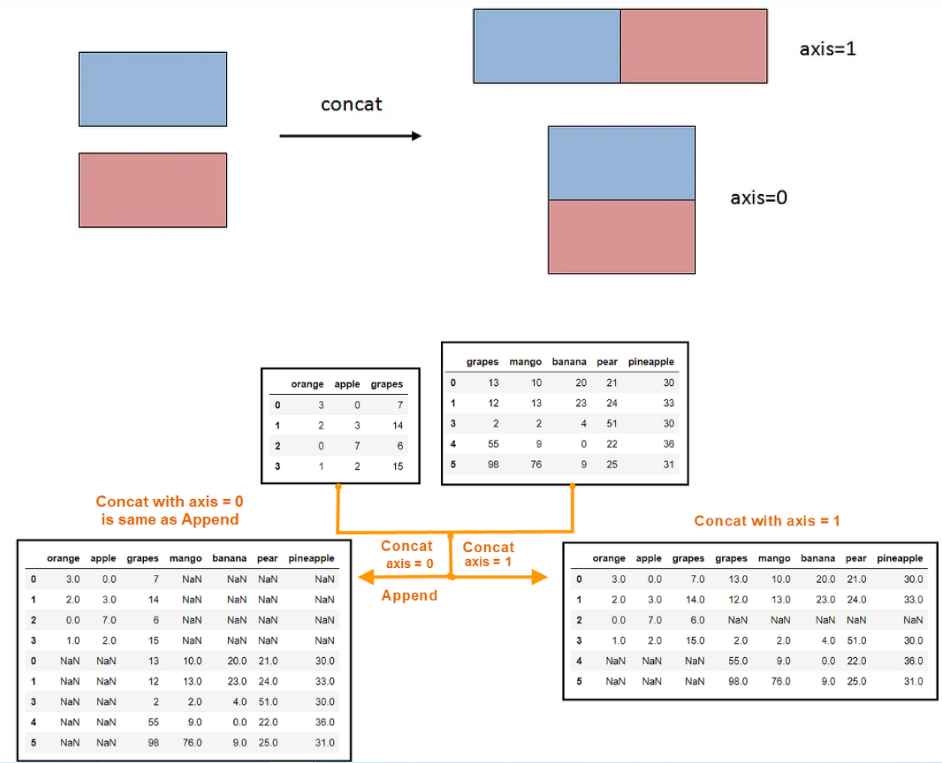

In [121]:
one

name subject_id  marks_scored
1    Alex       sub1            98
2     Amy       sub2            90
3   Allen       sub4            87
4   Alice       sub6            69
5  Ayoung       sub5            78

In [122]:
two

name subject_id  marks_scored
1  Billy       sub2            89
2  Brian       sub4            80
3   Bran       sub3            79
4  Bryce       sub6            97
5  Betty       sub5            88

In [123]:
pd.concat([one, two])

name subject_id  marks_scored
1    Alex       sub1            98
2     Amy       sub2            90
3   Allen       sub4            87
4   Alice       sub6            69
5  Ayoung       sub5            78
1   Billy       sub2            89
2   Brian       sub4            80
3    Bran       sub3            79
4   Bryce       sub6            97
5   Betty       sub5            88

In [124]:
pd.concat([one, two], ignore_index=True)  #It numbered the rows sequentially.

name subject_id  marks_scored
0    Alex       sub1            98
1     Amy       sub2            90
2   Allen       sub4            87
3   Alice       sub6            69
4  Ayoung       sub5            78
5   Billy       sub2            89
6   Brian       sub4            80
7    Bran       sub3            79
8   Bryce       sub6            97
9   Betty       sub5            88

In [125]:
pd.concat([one, two], axis=1)

name subject_id  marks_scored   name subject_id  marks_scored
1    Alex       sub1            98  Billy       sub2            89
2     Amy       sub2            90  Brian       sub4            80
3   Allen       sub4            87   Bran       sub3            79
4   Alice       sub6            69  Bryce       sub6            97
5  Ayoung       sub5            78  Betty       sub5            88

In [126]:
pd.concat([one, two], axis=1, ignore_index=True)  #It numbered the columns sequentially.

0     1   2      3     4   5
1    Alex  sub1  98  Billy  sub2  89
2     Amy  sub2  90  Brian  sub4  80
3   Allen  sub4  87   Bran  sub3  79
4   Alice  sub6  69  Bryce  sub6  97
5  Ayoung  sub5  78  Betty  sub5  88

## <font color='blue'> <b>merge()</b><font color='black'>
    
**merge()**, is an operation to combine two or more datasets based on a common column.

Data is merged based on values in common columns, creating a single dataset.

merge() is commonly used to fill missing or different values in a dataset or to bring together different data sources.

[Source 01](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html), 
[Source 02](https://www.w3schools.com/python/pandas/ref_df_merge.asp), 
[Source 03](https://www.digitalocean.com/community/tutorials/pandas-merge-two-dataframe),
[Source 04](https://towardsdatascience.com/why-and-how-to-use-merge-with-pandas-in-python-548600f7e738)
    
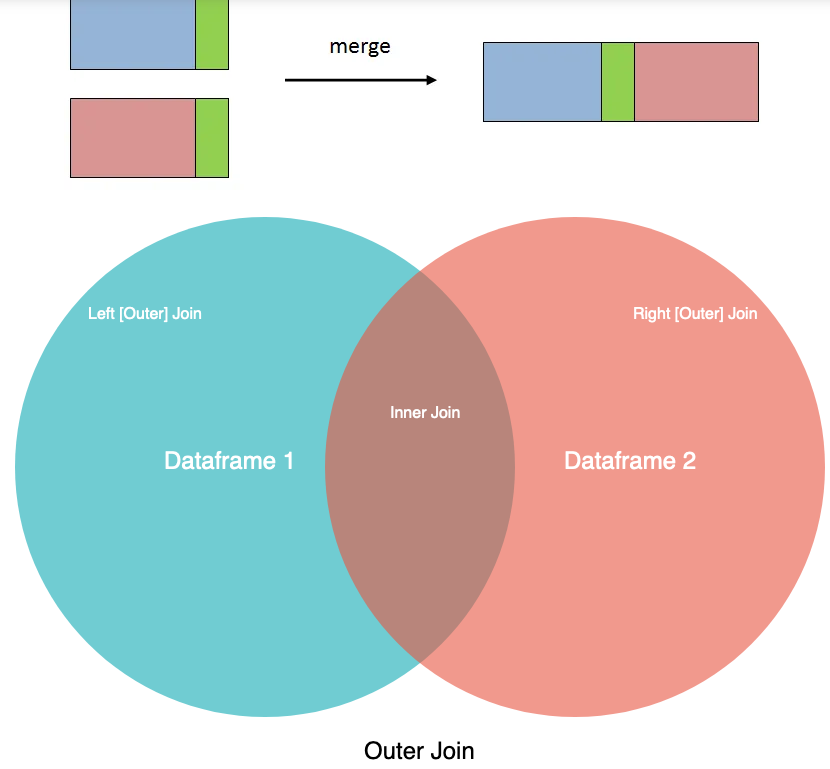
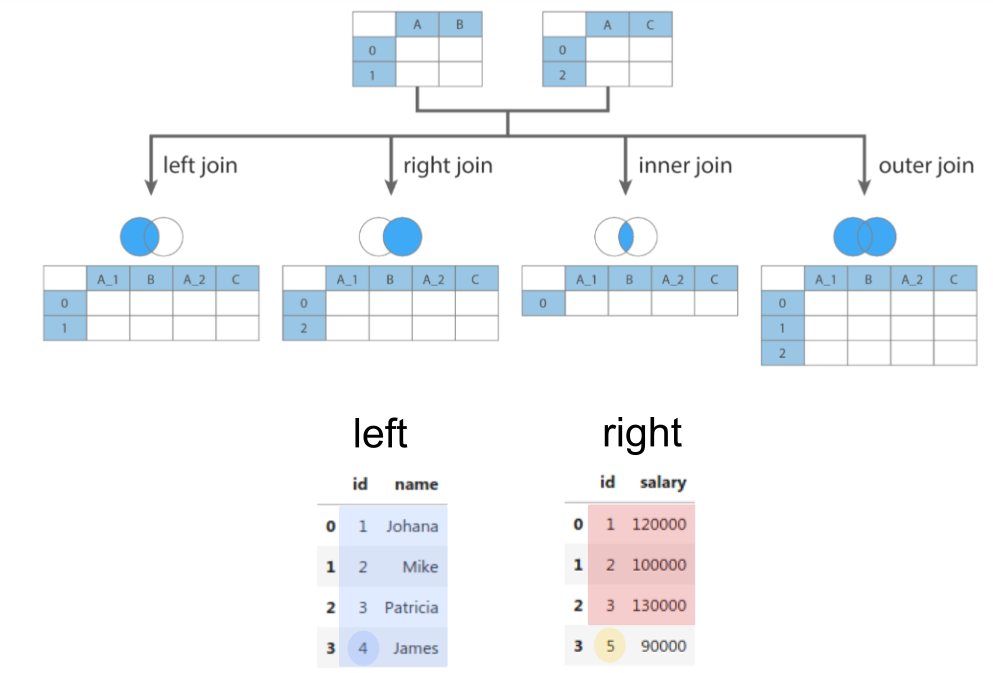
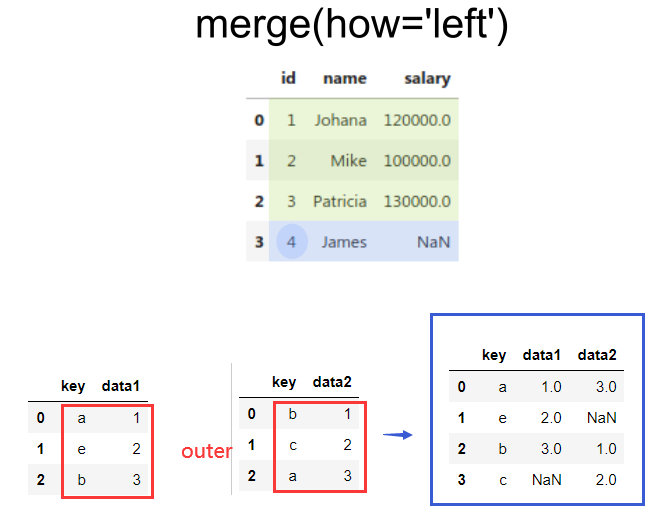

In [127]:
x = pd.DataFrame({'ürün': ['gömlek', 'kazak', 'sweat', 'çorap'],
                     'Ankara': [3,4,6,0],
                     'Bursa': [0,5,2,8]})
y = pd.DataFrame({'ürün': ['gömlek', 'kazak', 'sweat', 'pantolon'],
                          'İstanbul': [2,1,0,7],
                          'İzmir': [3,2,2,0]})

In [128]:
x

ürün  Ankara  Bursa
0  gömlek       3      0
1   kazak       4      5
2   sweat       6      2
3   çorap       0      8

In [129]:
y

ürün  İstanbul  İzmir
0    gömlek         2      3
1     kazak         1      2
2     sweat         0      2
3  pantolon         7      0

In [130]:
?pd.merge

Signature:
pd.merge(
    left: 'DataFrame | Series',
    right: 'DataFrame | Series',
    how: 'MergeHow' = 'inner',
    on: 'IndexLabel | None' = None,
    left_on: 'IndexLabel | None' = None,
    right_on: 'IndexLabel | None' = None,
    left_index: 'bool' = False,
    right_index: 'bool' = False,
    sort: 'bool' = False,
    suffixes: 'Suffixes' = ('_x', '_y'),
    copy: 'bool | None' = None,
    indicator: 'str | bool' = False,
    validate: 'str | None' = None,
) -> 'DataFrame'
Docstring:
Merge DataFrame or named Series objects with a database-style join.

A named Series object is treated as a DataFrame with a single named column.

The join is done on columns or indexes. If joining columns on
columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
on indexes or indexes on a column or columns, the index will be passed on.
When performing a cross merge, no column specifications to merge on are
allowed.

.. warning::

    If both key columns contain rows where

In [131]:
pd.merge(x,y)  #Assumed how value is inner. Returned the common elements.

ürün  Ankara  Bursa  İstanbul  İzmir
0  gömlek       3      0         2      3
1   kazak       4      5         1      2
2   sweat       6      2         0      2

In [132]:
pd.merge(x,y, how= "left")

ürün  Ankara  Bursa  İstanbul  İzmir
0  gömlek       3      0       2.0    3.0
1   kazak       4      5       1.0    2.0
2   sweat       6      2       0.0    2.0
3   çorap       0      8       NaN    NaN

In [133]:
pd.merge(x,y, how= "left", on= "ürün") #The on parameter specifies the common column(s) used for merging.

ürün  Ankara  Bursa  İstanbul  İzmir
0  gömlek       3      0       2.0    3.0
1   kazak       4      5       1.0    2.0
2   sweat       6      2       0.0    2.0
3   çorap       0      8       NaN    NaN

In [134]:
pd.merge(x,y, how= "right", on= "ürün") #Because it was "right," this time it added "pantolon" at the end.

ürün  Ankara  Bursa  İstanbul  İzmir
0    gömlek     3.0    0.0         2      3
1     kazak     4.0    5.0         1      2
2     sweat     6.0    2.0         0      2
3  pantolon     NaN    NaN         7      0

In [135]:
pd.merge(x,y, how= "outer", on= "ürün") #all appeared

ürün  Ankara  Bursa  İstanbul  İzmir
0    gömlek     3.0    0.0       2.0    3.0
1     kazak     4.0    5.0       1.0    2.0
2     sweat     6.0    2.0       0.0    2.0
3     çorap     0.0    8.0       NaN    NaN
4  pantolon     NaN    NaN       7.0    0.0

In [136]:
df1 = pd.DataFrame({'lkey': ['x', 'y', 'z', 'x'],
                    'lvalue': [2, 3, 5, 7]})
df2 = pd.DataFrame({'rkey': ['a', 'x', 'z', 'b'],
                    'rvalue': [7, 8, 9, 10]})

In [137]:
df1

lkey  lvalue
0    x       2
1    y       3
2    z       5
3    x       7

In [138]:
df2

rkey  rvalue
0    a       7
1    x       8
2    z       9
3    b      10

In [139]:
pd.merge(df1, df2, how= 'inner')  #It gave an error because there was no common column name.

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [ ]:
pd.merge(df1, df2, how= 'inner', left_on= "lkey", right_on="rkey")  #I specified that lkey and rkey are common.

lkey  lvalue rkey  rvalue
0    x       2    x       8
1    x       7    x       8
2    z       5    z       9

## <font color='blue'> <b>join()</b><font color='black'>
    
**join()**, is an operation to merge two or more DataFrames based on a specified column.

It is commonly used in SQL-based data processing operations.

[Source 01](https://sparkbyexamples.com/pandas/pandas-join-explained-with-examples/), 
[Source 02](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html), 
[Source 03](https://www.w3schools.com/python/pandas/ref_df_join.asp)
 
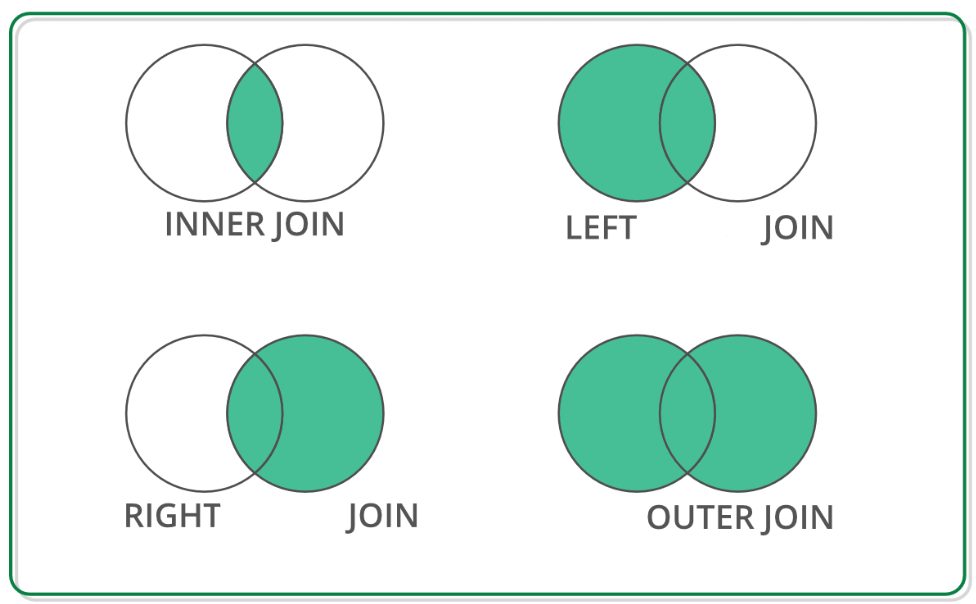

In [ ]:
df3 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index = ['K0', 'K1', 'K2'])
df4 = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index = ['K0', 'K2', 'K3'])

In [ ]:
df3

A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2

In [ ]:
df4

C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3

In [ ]:
df3.join(df4)

A   B    C    D
K0  A0  B0   C0   D0
K1  A1  B1  NaN  NaN
K2  A2  B2   C2   D2

In [ ]:
df4.join(df3)

C   D    A    B
K0  C0  D0   A0   B0
K2  C2  D2   A2   B2
K3  C3  D3  NaN  NaN

In [ ]:
df3.join(df4, how="outer")  #It merged everything. It filled the values it couldn't find with NaN.

A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3

In [ ]:
df5 = pd.DataFrame({'key': ['K0', 'K2', 'K3', 'K4', 'K5', 'K6'],
                   'X': ['X0', 'X2', 'X3', 'X4', 'X5', 'X6']})
df6 = pd.DataFrame({'key': ['K0', 'K2', 'K3'],
                      'Y': ['Y0', 'Y2', 'Y3']})

In [ ]:
df5

key   X
0  K0  X0
1  K2  X2
2  K3  X3
3  K4  X4
4  K5  X5
5  K6  X6

In [ ]:
df6

key   Y
0  K0  Y0
1  K2  Y2
2  K3  Y3

In [ ]:
df5.join(df6, lsuffix= "_left" )  #It changed the name of the common left key column using lsuffix.

key_left   X  key    Y
0       K0  X0   K0   Y0
1       K2  X2   K2   Y2
2       K3  X3   K3   Y3
3       K4  X4  NaN  NaN
4       K5  X5  NaN  NaN
5       K6  X6  NaN  NaN

In [ ]:
df5.join(df6, rsuffix= "_right" )

key   X key_right    Y
0  K0  X0        K0   Y0
1  K2  X2        K2   Y2
2  K3  X3        K3   Y3
3  K4  X4       NaN  NaN
4  K5  X5       NaN  NaN
5  K6  X6       NaN  NaN

# <font color='green'> <b>Text Data - String Methods</b><font color='black'>
    
**str.lower():** Converts a string to lowercase.

**str.upper():** Converts a string to uppercase.

**str.capitalize():** Converts the first character of a string to uppercase and the rest to lowercase.

**str.title():** Converts the first character of each word in a string to uppercase.

**str.swapcase():** Swaps the case of each character in a string (lowercase to uppercase and vice versa).

**str.isalpha():** Checks if all characters in a string are alphabetic and returns True or False.

**str.isnumeric():** Checks if all characters in a string are numeric and returns True or False.

**str.isalnum():** Checks if all characters in a string are alphanumeric (letters or numbers) and returns True or False.

**str.endswith():** Checks if a string ends with a specified value and returns True or False.

**str.startswith():** Checks if a string starts with a specified value and returns True or False.

**str.contains():** Checks if a substring is present in a string and returns True or False for each item.

**str.strip():** Removes leading and trailing whitespace from a string and returns a trimmed version.

**str.replace():** Returns a string where a specified value is replaced with another value.

**str.split():** Splits a string into a list of substrings based on a delimiter.

**str.find():** Searches for a specified value in a string and returns the index position where it was found.

**str.findall():** Returns a list of all occurrences of a pattern in a string.

**str.join():** Concatenates elements of an iterable into a single string.

These methods are used for various string operations such as case conversion, checking character types, searching for substrings, and manipulating string content.

[SOURCE01](https://docs.python.org/3/library/stdtypes.html#string-methods),
[SOURCE02](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html),
[SOURCE03](https://www.aboutdatablog.com/post/10-most-useful-string-functions-in-pandas),
[SOURCE04](https://www.tutorialspoint.com/python_pandas/python_pandas_working_with_text_data.htm) &
[Video](https://www.youtube.com/watch?v=6JNwK6hEneg)

In [141]:
df = pd.DataFrame(data=[['Tyler DURDEN', 'HR', "manager", "$180,000", 55],
                        ['MARIA puder', "IT", "data analyst", "150000dolar", 28],
                        ['dorothy gale', "HR", "recruiter", "$120,000", 30],
                        ['Edmond Dantes', "IT", "data scientist", "$170,000","-"], 
                        ['Gregor SAMSA',"IT", "frontend developer", "120000dolar",32]],
                  columns=["name","dept", "job", "salary", "age"])

In [142]:
df

name dept                 job       salary age
0   Tyler DURDEN   HR             manager     $180,000  55
1    MARIA puder   IT        data analyst  150000dolar  28
2   dorothy gale   HR           recruiter     $120,000  30
3  Edmond Dantes   IT      data scientist     $170,000   -
4   Gregor SAMSA   IT  frontend developer  120000dolar  32

In [143]:
df.name.str.lower()

0     tyler durden
1      maria puder
2     dorothy gale
3    edmond dantes
4     gregor samsa
Name: name, dtype: object

In [144]:
df.name.str.title()

0     Tyler Durden
1      Maria Puder
2     Dorothy Gale
3    Edmond Dantes
4     Gregor Samsa
Name: name, dtype: object

In [145]:
df.age.str.isnumeric()  #Due to the "-" sign in the "age" column, it is seen as an object, so the entire column is treated as an object.

0      NaN
1      NaN
2      NaN
3    False
4      NaN
Name: age, dtype: object

In [146]:
df

name dept                 job       salary age
0   Tyler DURDEN   HR             manager     $180,000  55
1    MARIA puder   IT        data analyst  150000dolar  28
2   dorothy gale   HR           recruiter     $120,000  30
3  Edmond Dantes   IT      data scientist     $170,000   -
4   Gregor SAMSA   IT  frontend developer  120000dolar  32

In [147]:
df.salary.str.startswith("$")

0     True
1    False
2     True
3     True
4    False
Name: salary, dtype: bool

In [148]:
df.salary.str.startswith("$").sum()

3

In [149]:
df[df.job == "data analyst"]

name dept           job       salary age
1  MARIA puder   IT  data analyst  150000dolar  28

In [150]:
df.job.str.contains("data")

0    False
1     True
2    False
3     True
4    False
Name: job, dtype: bool

In [151]:
df

name dept                 job       salary age
0   Tyler DURDEN   HR             manager     $180,000  55
1    MARIA puder   IT        data analyst  150000dolar  28
2   dorothy gale   HR           recruiter     $120,000  30
3  Edmond Dantes   IT      data scientist     $170,000   -
4   Gregor SAMSA   IT  frontend developer  120000dolar  32

In [152]:
df.salary.str.strip("dolar$")

0    180,000
1     150000
2    120,000
3    170,000
4     120000
Name: salary, dtype: object

In [153]:
df.salary.str.strip("dolar$").str.replace(",","")

0    180000
1    150000
2    120000
3    170000
4    120000
Name: salary, dtype: object

In [154]:
df.salary = df.salary.str.strip("dolar$").str.replace(",","").astype(int)

In [155]:
df.name = df.name.str.title()

In [156]:
df.age.astype("str").str.replace("-", "nan")  #Dummy attempt

0     55
1     28
2     30
3    nan
4     32
Name: age, dtype: object

In [157]:
df.age = df["age"].replace("-", np.nan)

In [158]:
df

name dept                 job  salary   age
0   Tyler Durden   HR             manager  180000  55.0
1    Maria Puder   IT        data analyst  150000  28.0
2   Dorothy Gale   HR           recruiter  120000  30.0
3  Edmond Dantes   IT      data scientist  170000   NaN
4   Gregor Samsa   IT  frontend developer  120000  32.0

# <font color='green'> <b>Dummy Operations</b><font color='black'>
    
**get_dummies()**, is a commonly used function in machine learning and data analysis.

It is typically used to convert categorical variables or textual data into numerical or binary format, which can be easily processed by machine learning algorithms.

[SOURCE01](https://www.sharpsightlabs.com/blog/pandas-get-dummies/),
[SOURCE02](https://dataindependent.com/pandas/pandas-get-dummies-pd-get_dummies/),
[SOURCE03](https://www.educative.io/answers/what-is-the-getdummies-function-in-pandas),
[SOURCE04](https://www.w3resource.com/pandas/get_dummies.php)
    
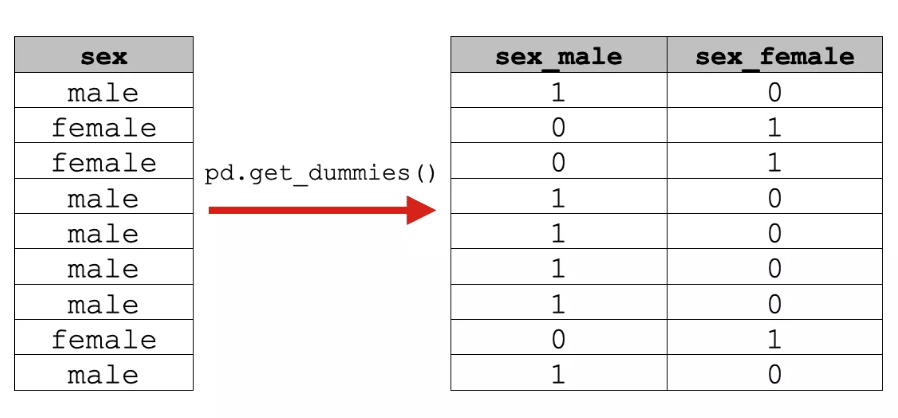
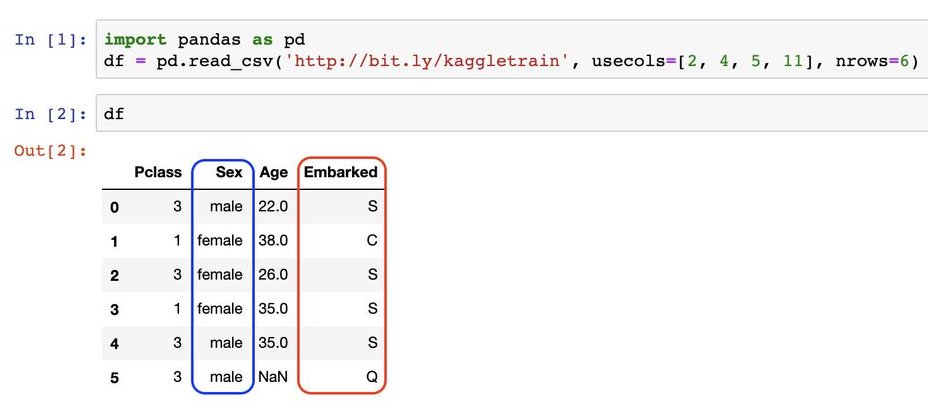
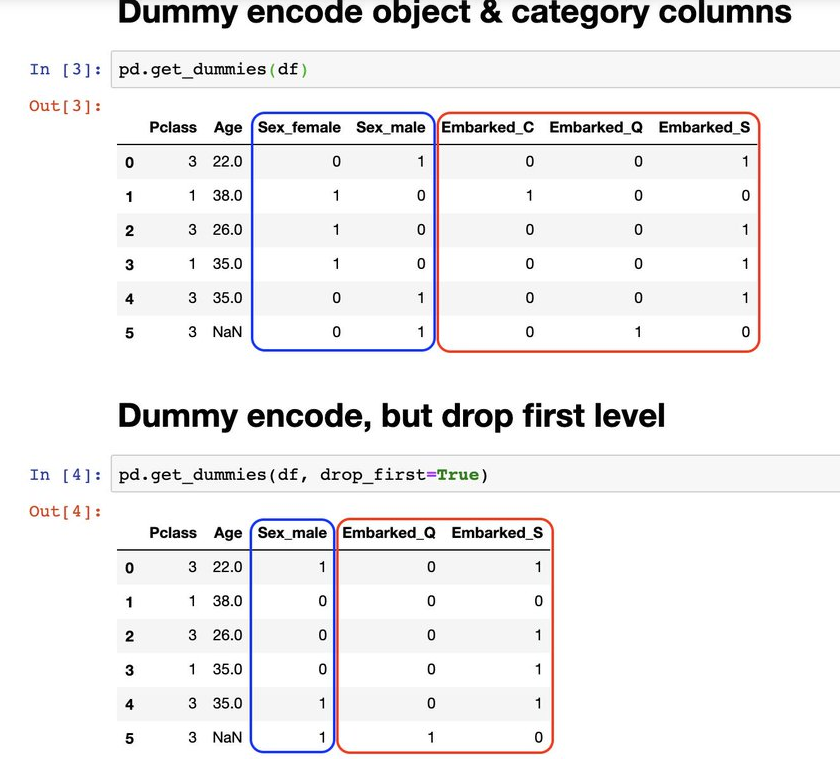
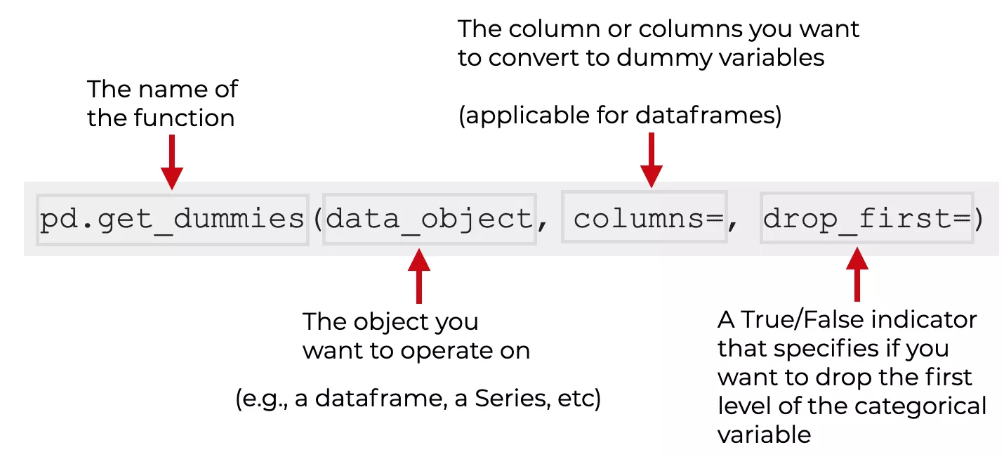    

In [159]:
df

name dept                 job  salary   age
0   Tyler Durden   HR             manager  180000  55.0
1    Maria Puder   IT        data analyst  150000  28.0
2   Dorothy Gale   HR           recruiter  120000  30.0
3  Edmond Dantes   IT      data scientist  170000   NaN
4   Gregor Samsa   IT  frontend developer  120000  32.0

In [162]:
pd.get_dummies(df.dept, dtype= int)

HR  IT
0   1   0
1   0   1
2   1   0
3   0   1
4   0   1

In [163]:
pd.get_dummies(df.dept, drop_first= True, dtype= int) #deleted dropfirst and HR

IT
0   0
1   1
2   0
3   1
4   1

In [165]:
pd.get_dummies(df.job, dtype=int)

data analyst  data scientist  frontend developer  manager  recruiter
0             0               0                   0        1          0
1             1               0                   0        0          0
2             0               0                   0        0          1
3             0               1                   0        0          0
4             0               0                   1        0          0

In [169]:
pd.get_dummies(df, dtype=int)

salary   age  name_Dorothy Gale  name_Edmond Dantes  name_Gregor Samsa  \
0  180000  55.0                  0                   0                  0   
1  150000  28.0                  0                   0                  0   
2  120000  30.0                  1                   0                  0   
3  170000   NaN                  0                   1                  0   
4  120000  32.0                  0                   0                  1   

   name_Maria Puder  name_Tyler Durden  dept_HR  dept_IT  job_data analyst  \
0                 0                  1        1        0                 0   
1                 1                  0        0        1                 1   
2                 0                  0        1        0                 0   
3                 0                  0        0        1                 0   
4                 0                  0        0        1                 0   

   job_data scientist  job_frontend developer  job_manager  job_recruiter  
0                   0                       0            1              0  
1                   0                       0            0              0  
2                   0                       0            0              1  
3                   1                       0            0              0  
4                   0                       1            0              0

In [170]:
pd.get_dummies(df, columns=["dept", "job"], dtype=int)

name  salary   age  dept_HR  dept_IT  job_data analyst  \
0   Tyler Durden  180000  55.0        1        0                 0   
1    Maria Puder  150000  28.0        0        1                 1   
2   Dorothy Gale  120000  30.0        1        0                 0   
3  Edmond Dantes  170000   NaN        0        1                 0   
4   Gregor Samsa  120000  32.0        0        1                 0   

   job_data scientist  job_frontend developer  job_manager  job_recruiter  
0                   0                       0            1              0  
1                   0                       0            0              0  
2                   0                       0            0              1  
3                   1                       0            0              0  
4                   0                       1            0              0

In [171]:
df_final= pd.get_dummies(df, columns=["dept", "job"], dtype=int, drop_first=True)

In [172]:
df_final

name  salary   age  dept_IT  job_data scientist  \
0   Tyler Durden  180000  55.0        0                   0   
1    Maria Puder  150000  28.0        1                   0   
2   Dorothy Gale  120000  30.0        0                   0   
3  Edmond Dantes  170000   NaN        1                   1   
4   Gregor Samsa  120000  32.0        1                   0   

   job_frontend developer  job_manager  job_recruiter  
0                       0            1              0  
1                       0            0              0  
2                       0            0              1  
3                       0            0              0  
4                       1            0              0

# <font color='green'> <b>Import and Export DataFrame</b><font color='black'>

In [ ]:
df_final.to.csv("df_final.csv")  #error

In [ ]:
pd.read_csv("df_final.csv")  #error

In [176]:
df_final.to_csv("df_final_1.csv", index=False) # If we don't want to export the index labels, we should use index=False.

In [ ]:
pd.read_csv("df_final.csv", index_col=0) #If we want to specify a column's value to be used as index labels, we write it as follows.

In [177]:
pd.read_csv("df_final_1.csv")

name  salary   age  dept_IT  job_data scientist  \
0   Tyler Durden  180000  55.0        0                   0   
1    Maria Puder  150000  28.0        1                   0   
2   Dorothy Gale  120000  30.0        0                   0   
3  Edmond Dantes  170000   NaN        1                   1   
4   Gregor Samsa  120000  32.0        1                   0   

   job_frontend developer  job_manager  job_recruiter  
0                       0            1              0  
1                       0            0              0  
2                       0            0              1  
3                       0            0              0  
4                       1            0              0

In [179]:
df_final.to_excel("df_final.xlsx", index = False)  #Excel export

In [180]:
pd.read_excel("df_final.xlsx")

name  salary   age  dept_IT  job_data scientist  \
0   Tyler Durden  180000  55.0        0                   0   
1    Maria Puder  150000  28.0        1                   0   
2   Dorothy Gale  120000  30.0        0                   0   
3  Edmond Dantes  170000   NaN        1                   1   
4   Gregor Samsa  120000  32.0        1                   0   

   job_frontend developer  job_manager  job_recruiter  
0                       0            1              0  
1                       0            0              0  
2                       0            0              1  
3                       0            0              0  
4                       1            0              0

In [181]:
df_html = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)")

In [182]:
df_html

[                              Location  Population (1 July 2022)  \
 0                                World              7.975105e+09   
 1                                India              1.417173e+09   
 2                             China[a]              1.425887e+09   
 3                        United States              3.382899e+08   
 4                            Indonesia              2.755013e+08   
 ..                                 ...                       ...   
 234  Falkland Islands (United Kingdom)              3.780000e+03   
 235                               Niue              1.934000e+03   
 236              Tokelau (New Zealand)              1.871000e+03   
 237                    Vatican City[x]              5.100000e+02   
 238  Pitcairn Islands (United Kingdom)                       NaN   
 
      Population (1 July 2023)  Change UN Continental Region[1]  \
 0                8.045311e+09  +0.88%                      NaN   
 1                1.428628e+09  +0.8

In [183]:
type(df_html)

list

In [184]:
df_html[0]

Location  Population (1 July 2022)  \
0                                World              7.975105e+09   
1                                India              1.417173e+09   
2                             China[a]              1.425887e+09   
3                        United States              3.382899e+08   
4                            Indonesia              2.755013e+08   
..                                 ...                       ...   
234  Falkland Islands (United Kingdom)              3.780000e+03   
235                               Niue              1.934000e+03   
236              Tokelau (New Zealand)              1.871000e+03   
237                    Vatican City[x]              5.100000e+02   
238  Pitcairn Islands (United Kingdom)                       NaN   

     Population (1 July 2023)  Change UN Continental Region[1]  \
0                8.045311e+09  +0.88%                      NaN   
1                1.428628e+09  +0.81%                     Asia   
2                1.425671e+09  −0.02%                     Asia   
3                3.399966e+08  +0.50%                 Americas   
4                2.775341e+08  +0.74%                     Asia   
..                        ...     ...                      ...   
234              3.791000e+03  +0.29%                 Americas   
235              1.935000e+03  +0.05%                  Oceania   
236              1.893000e+03  +1.18%                  Oceania   
237              5.180000e+02     NaN                   Europe   
238                       NaN     NaN                  Oceania   

    UN Statistical Subregion[1]  
0                           NaN  
1                 Southern Asia  
2                  Eastern Asia  
3              Northern America  
4            South-eastern Asia  
..                          ...  
234               South America  
235                   Polynesia  
236                   Polynesia  
237             Southern Europe  
238                   Polynesia  

[239 rows x 6 columns]